In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('bank.csv')

# Display first few rows
print(df.head())

# Show dataset info (data types, missing values, etc.)
print(df.info())


   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 

In [4]:
# Check for missing values
print(df.isnull().sum())


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


In [6]:
# Convert date column to datetime if applicable
df['date'] = pd.to_datetime(df['date'], errors='coerce')


KeyError: 'date'

In [8]:
# List all column names to check for 'date'
print(df.columns)


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')


In [10]:
# Create a 'date' column by combining 'day' and 'month'
df['date'] = pd.to_datetime(df['month'].astype(str) + '-' + df['day'].astype(str), format='%b-%d')

# Check the new 'date' column
print(df[['month', 'day', 'date']].head())


  month  day       date
0   may    5 1900-05-05
1   may    5 1900-05-05
2   may    5 1900-05-05
3   may    5 1900-05-05
4   may    5 1900-05-05


In [12]:
# Set the year to 2023 (or your desired year)
df['date'] = pd.to_datetime(df['month'] + ' ' + df['day'].astype(str) + ' 2023', format='%b %d %Y')

# Check the new 'date' column
print(df[['month', 'day', 'date']].head())


  month  day       date
0   may    5 2023-05-05
1   may    5 2023-05-05
2   may    5 2023-05-05
3   may    5 2023-05-05
4   may    5 2023-05-05


In [14]:
# Summary statistics for numeric columns
print(df.describe())


                age       balance           day      duration      campaign  \
count  11162.000000  11162.000000  11162.000000  11162.000000  11162.000000   
mean      41.231948   1528.538524     15.658036    371.993818      2.508421   
min       18.000000  -6847.000000      1.000000      2.000000      1.000000   
25%       32.000000    122.000000      8.000000    138.000000      1.000000   
50%       39.000000    550.000000     15.000000    255.000000      2.000000   
75%       49.000000   1708.000000     22.000000    496.000000      3.000000   
max       95.000000  81204.000000     31.000000   3881.000000     63.000000   
std       11.913369   3225.413326      8.420740    347.128386      2.722077   

              pdays      previous                           date  
count  11162.000000  11162.000000                          11162  
mean      51.330407      0.832557  2023-06-21 12:19:13.341694976  
min       -1.000000      0.000000            2023-01-07 00:00:00  
25%       -1.000000 

In [16]:
# Check the distribution of 'deposit' (target variable)
deposit_counts = df['deposit'].value_counts()
deposit_percentage = df['deposit'].value_counts(normalize=True) * 100

# Display the counts and percentages
print(deposit_counts)
print(deposit_percentage)


deposit
no     5873
yes    5289
Name: count, dtype: int64
deposit
no     52.616019
yes    47.383981
Name: proportion, dtype: float64


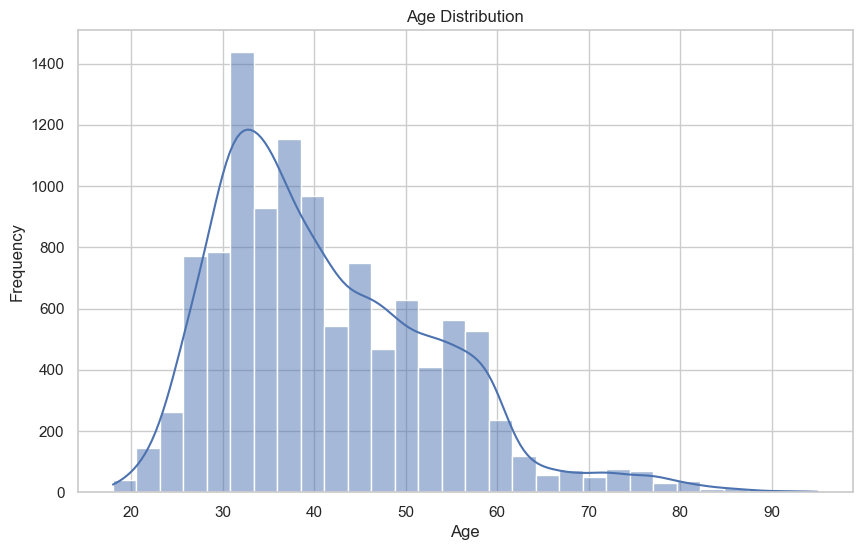

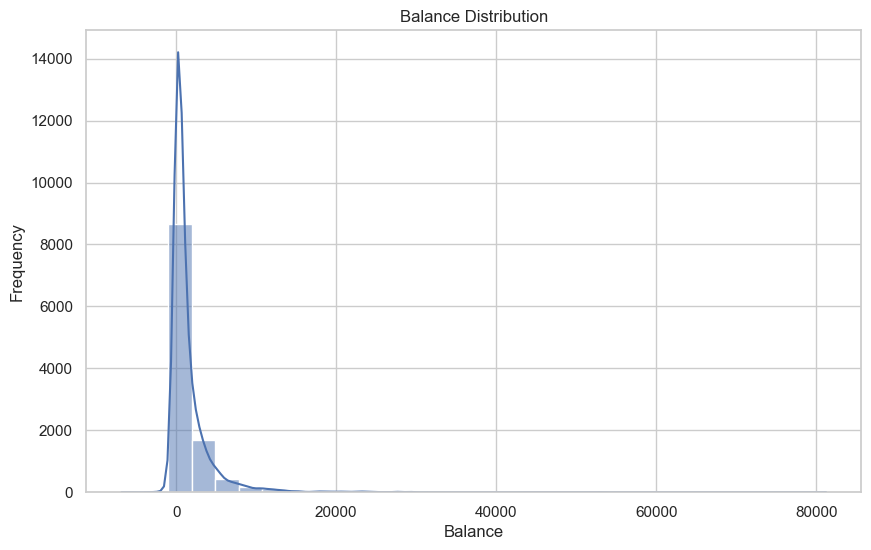

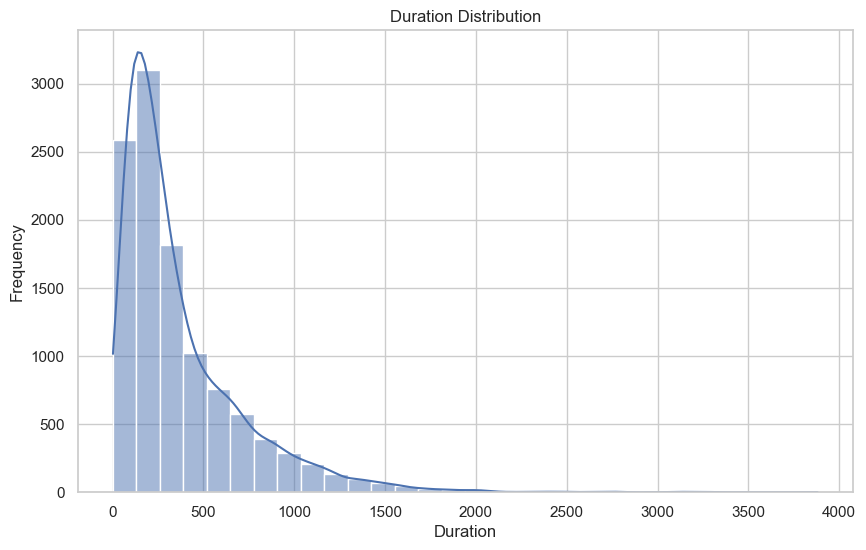

In [18]:
# Plot distribution of numerical columns
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting style
sns.set(style="whitegrid")

# Plotting Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Plotting Balance distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['balance'], bins=30, kde=True)
plt.title('Balance Distribution')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

# Plotting Duration distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['duration'], bins=30, kde=True)
plt.title('Duration Distribution')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()


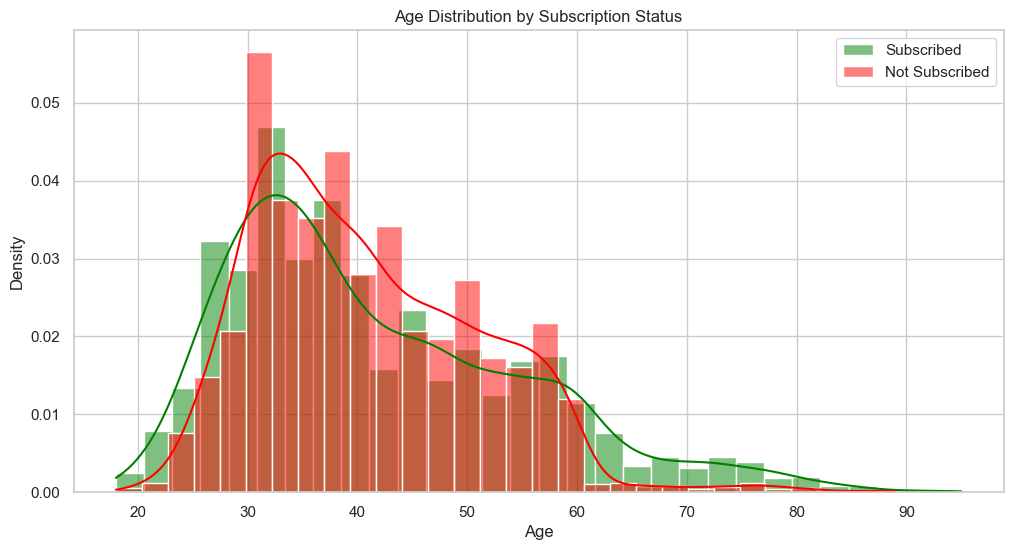

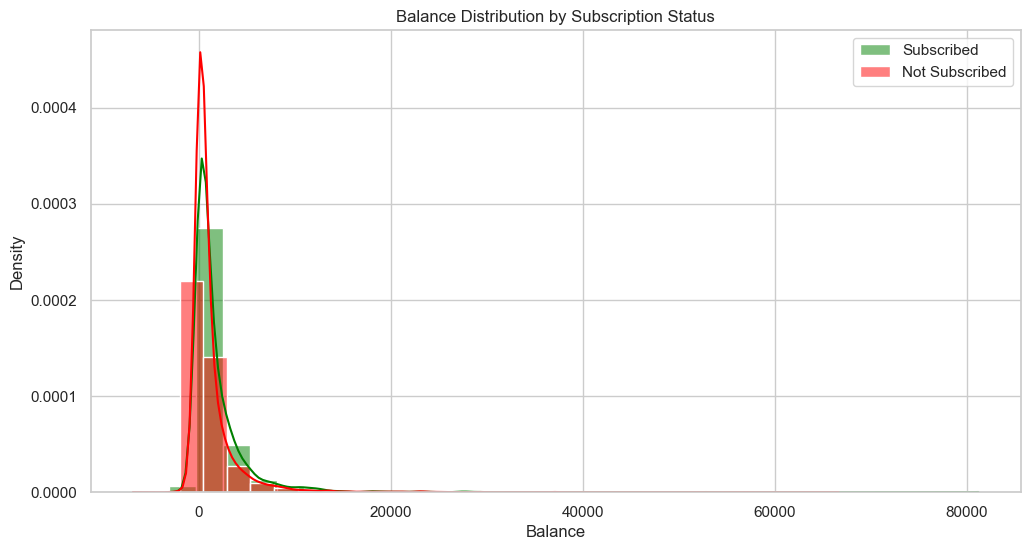

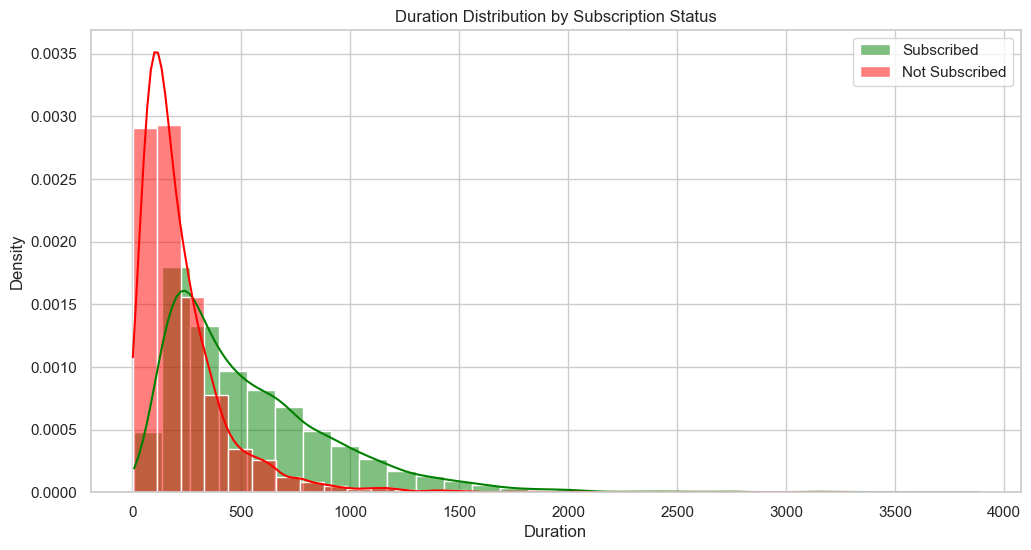

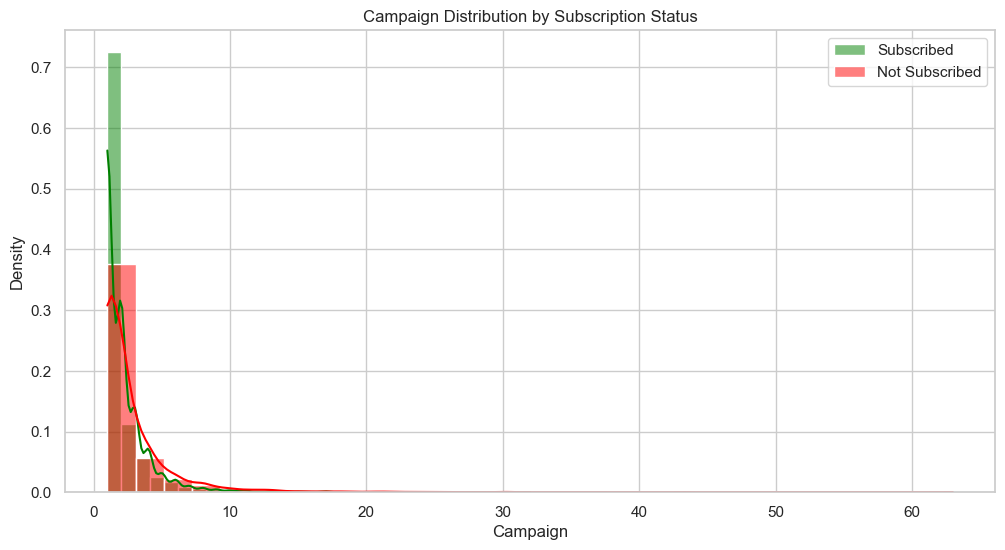

In [20]:
# Plotting Age distribution by deposit status
plt.figure(figsize=(12, 6))
sns.histplot(df[df['deposit'] == 'yes']['age'], color='green', kde=True, label='Subscribed', stat='density', bins=30)
sns.histplot(df[df['deposit'] == 'no']['age'], color='red', kde=True, label='Not Subscribed', stat='density', bins=30)
plt.title('Age Distribution by Subscription Status')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

# Plotting Balance distribution by deposit status
plt.figure(figsize=(12, 6))
sns.histplot(df[df['deposit'] == 'yes']['balance'], color='green', kde=True, label='Subscribed', stat='density', bins=30)
sns.histplot(df[df['deposit'] == 'no']['balance'], color='red', kde=True, label='Not Subscribed', stat='density', bins=30)
plt.title('Balance Distribution by Subscription Status')
plt.xlabel('Balance')
plt.ylabel('Density')
plt.legend()
plt.show()

# Plotting Duration distribution by deposit status
plt.figure(figsize=(12, 6))
sns.histplot(df[df['deposit'] == 'yes']['duration'], color='green', kde=True, label='Subscribed', stat='density', bins=30)
sns.histplot(df[df['deposit'] == 'no']['duration'], color='red', kde=True, label='Not Subscribed', stat='density', bins=30)
plt.title('Duration Distribution by Subscription Status')
plt.xlabel('Duration')
plt.ylabel('Density')
plt.legend()
plt.show()

# Plotting Campaign distribution by deposit status
plt.figure(figsize=(12, 6))
sns.histplot(df[df['deposit'] == 'yes']['campaign'], color='green', kde=True, label='Subscribed', stat='density', bins=30)
sns.histplot(df[df['deposit'] == 'no']['campaign'], color='red', kde=True, label='Not Subscribed', stat='density', bins=30)
plt.title('Campaign Distribution by Subscription Status')
plt.xlabel('Campaign')
plt.ylabel('Density')
plt.legend()
plt.show()


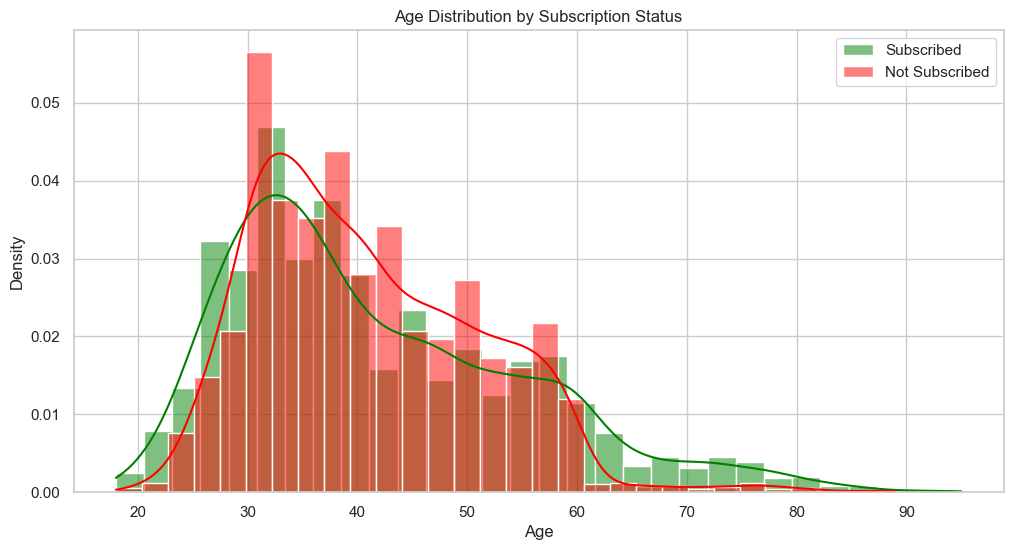

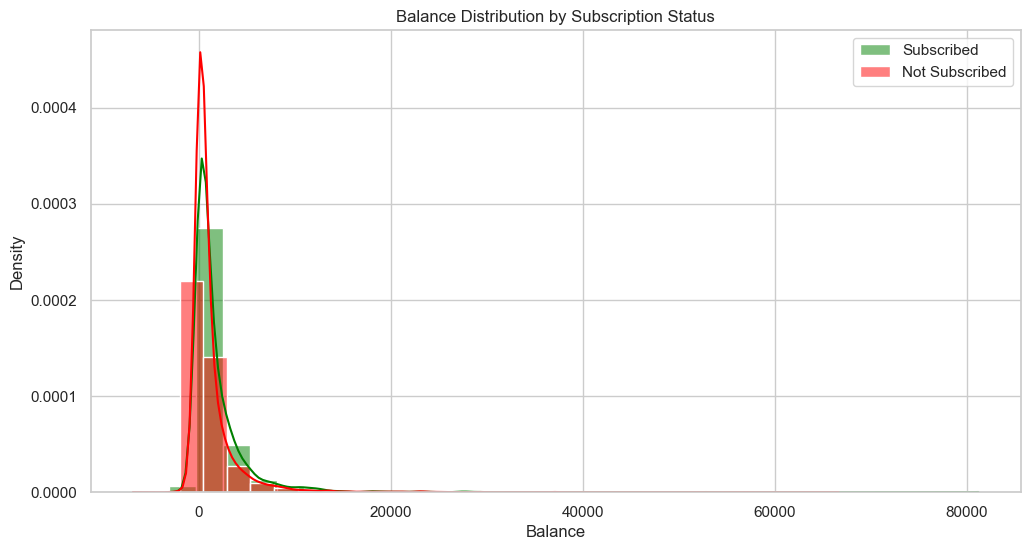

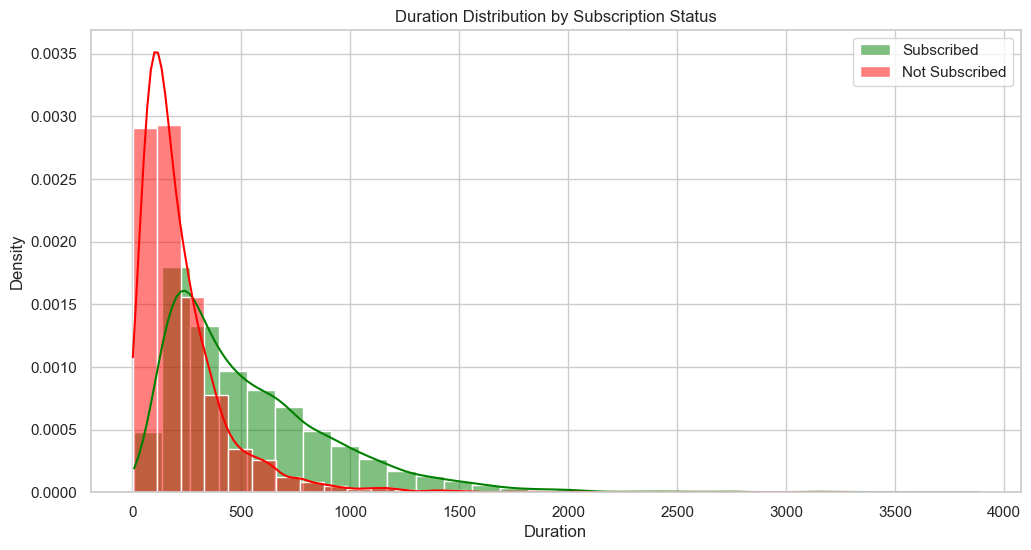

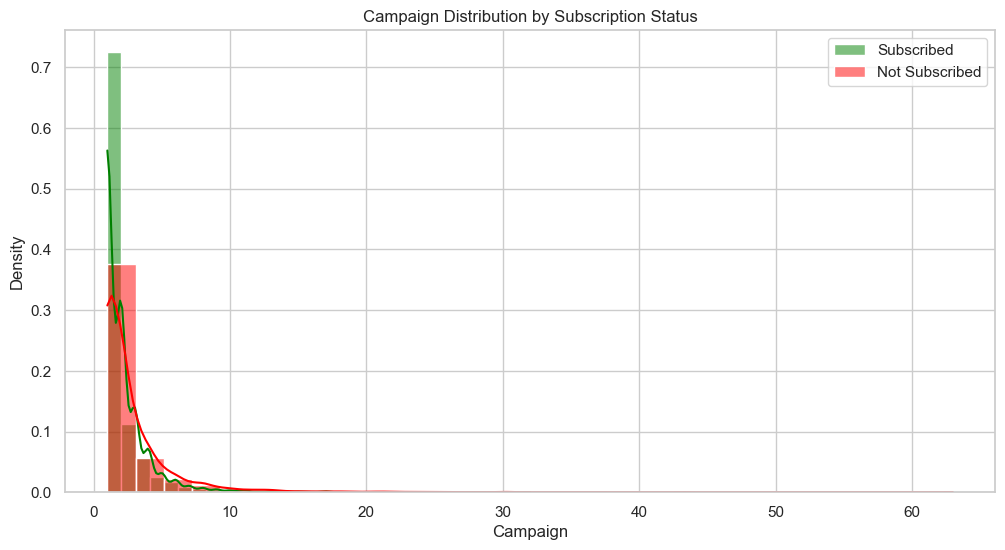

In [22]:
# Plotting Age distribution by deposit status
plt.figure(figsize=(12, 6))
sns.histplot(df[df['deposit'] == 'yes']['age'], color='green', kde=True, label='Subscribed', stat='density', bins=30)
sns.histplot(df[df['deposit'] == 'no']['age'], color='red', kde=True, label='Not Subscribed', stat='density', bins=30)
plt.title('Age Distribution by Subscription Status')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

# Plotting Balance distribution by deposit status
plt.figure(figsize=(12, 6))
sns.histplot(df[df['deposit'] == 'yes']['balance'], color='green', kde=True, label='Subscribed', stat='density', bins=30)
sns.histplot(df[df['deposit'] == 'no']['balance'], color='red', kde=True, label='Not Subscribed', stat='density', bins=30)
plt.title('Balance Distribution by Subscription Status')
plt.xlabel('Balance')
plt.ylabel('Density')
plt.legend()
plt.show()

# Plotting Duration distribution by deposit status
plt.figure(figsize=(12, 6))
sns.histplot(df[df['deposit'] == 'yes']['duration'], color='green', kde=True, label='Subscribed', stat='density', bins=30)
sns.histplot(df[df['deposit'] == 'no']['duration'], color='red', kde=True, label='Not Subscribed', stat='density', bins=30)
plt.title('Duration Distribution by Subscription Status')
plt.xlabel('Duration')
plt.ylabel('Density')
plt.legend()
plt.show()

# Plotting Campaign distribution by deposit status
plt.figure(figsize=(12, 6))
sns.histplot(df[df['deposit'] == 'yes']['campaign'], color='green', kde=True, label='Subscribed', stat='density', bins=30)
sns.histplot(df[df['deposit'] == 'no']['campaign'], color='red', kde=True, label='Not Subscribed', stat='density', bins=30)
plt.title('Campaign Distribution by Subscription Status')
plt.xlabel('Campaign')
plt.ylabel('Density')
plt.legend()
plt.show()


In [24]:
# Cross-tabulation for job vs deposit subscription
job_subscription = pd.crosstab(df['job'], df['deposit'])
job_subscription_percentage = job_subscription.div(job_subscription.sum(1), axis=0) * 100

# Display
print(job_subscription_percentage)


deposit               no        yes
job                                
admin.         52.698651  47.301349
blue-collar    63.580247  36.419753
entrepreneur   62.500000  37.500000
housemaid      60.218978  39.781022
management     49.298519  50.701481
retired        33.676093  66.323907
self-employed  53.827160  46.172840
services       60.021668  39.978332
student        25.277778  74.722222
technician     53.922106  46.077894
unemployed     43.417367  56.582633
unknown        51.428571  48.571429
